## Réseaux de neurones embedding sans modèle pré-entrainé 
### paramètres : vocabulaire limité à 20000
###              vecteurs de taille 300

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D, Flatten,GRU, Conv1D, GlobalMaxPool1D,Activation
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import ast
from gensim.models import Word2Vec

In [15]:
df = pd.read_csv("/home/ensai/imatag/website_categorization_custom/categorization/Datasets/Feature_dataset_2023-02-01_clean_full.csv")
df = df.drop("Unnamed: 0", axis = 1)


def convert_to_list(row):
    return ast.literal_eval(row['tokens'])

df['tokens'] = df.apply(convert_to_list, axis = 1)

data = []
for index,row in df.iterrows():
    data.append({"class":row["main_category"], "tokens":row["tokens"]})

words = []
classes = []
documents = []

data_tokens = [' '.join(data[i]['tokens']) for i in range(len(data))]

y = [data[i]['class'] for i in range(len(data))]


In [16]:
labels = pd.get_dummies(y)


tokenizer = Tokenizer(20000)

tokenizer.fit_on_texts(data_tokens)
sequences = tokenizer.texts_to_sequences(data_tokens)
data = pad_sequences(sequences, maxlen=300,padding='post')

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42,stratify=labels)


In [18]:

model = Sequential()

model.add(Embedding(input_dim=20000, output_dim=300, input_length=300))

model.add(GlobalAveragePooling1D())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 300)          6000000   
                                                                 
 global_average_pooling1d_2   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                19264     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 25)                1625      
                                                                 
Total params: 6,020,889
Trainable params: 6,020,889
Non-trainable params: 0
____________________________________________

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stop])


Epoch 1/20
536/536 [==============================] - 60s 110ms/step - loss: 2.7785 - accuracy: 0.2316 - val_loss: 2.1830 - val_accuracy: 0.4380
Epoch 2/20
536/536 [==============================] - 54s 101ms/step - loss: 1.8516 - accuracy: 0.5089 - val_loss: 1.7120 - val_accuracy: 0.5550
Epoch 3/20
536/536 [==============================] - 43s 81ms/step - loss: 1.3641 - accuracy: 0.6398 - val_loss: 1.6103 - val_accuracy: 0.5723
Epoch 4/20
536/536 [==============================] - 53s 98ms/step - loss: 1.0516 - accuracy: 0.7288 - val_loss: 1.6088 - val_accuracy: 0.5704
Epoch 5/20
536/536 [==============================] - 59s 111ms/step - loss: 0.8471 - accuracy: 0.7822 - val_loss: 1.6739 - val_accuracy: 0.5737
Epoch 6/20
536/536 [==============================] - 58s 108ms/step - loss: 0.6957 - accuracy: 0.8221 - val_loss: 1.7945 - val_accuracy: 0.5784
Epoch 7/20
536/536 [==============================] - 59s 110ms/step - loss: 0.6063 - accuracy: 0.8478 - val_loss: 1.9071 - val_accu

In [21]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8942
Testing Accuracy:  0.5662


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


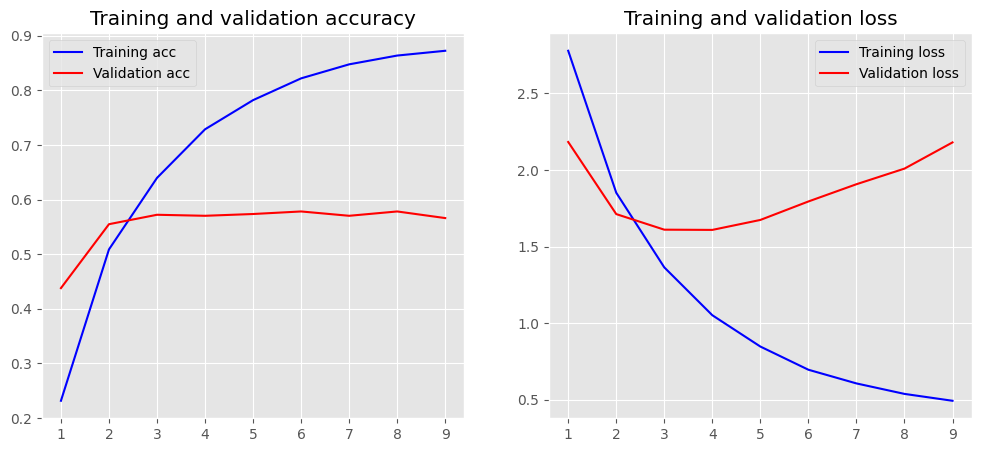

In [23]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    print(history.history.keys())
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)